# Classification  of credit card

In this notebook we will use a binary classification to detect weither or not  a person will default on his or her credit card payment .We will work with the credit_default dataset. [link of the course](https://openclassrooms.com/en/courses/5873596-design-effective-statistical-models-to-understand-your-data/6233016-build-and-interpret-a-logistic-regression-model)


Now let's charge the dataset with No=0 and Yes=1

In [77]:
import pandas as pd
df=pd.read_csv("data/credit_default_sampled.csv")
df.head()

,default,student,balance,income
0,1,Yes,1.486998,17.854397
1,1,Yes,2.205800,14.271492
2,1,Yes,1.774694,20.359506
3,1,No,1.889599,48.956172
4,1,Yes,1.899391,20.655200


The dataset has then following predictors
* countinuous variables balance and income 
* binary variable student which indicate if a person is student or not

the outcome is default which indicate wheither the personne default on her/his card 

#### Logistic regression with statsmodels.logit()

Before build the logistic regression we must to convert the value of default variable to 0/1
Arbitrary we we choose Yes as 1 et No as 0

Let's use the logit method to do our logistic regression models with the predictors

In [78]:
import statsmodels.formula.api as smf
df["default"].dtype
result=smf.logit(formula="default ~ income + balance",data=df).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.248126
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  833
Model:                          Logit   Df Residuals:                      830
Method:                           MLE   Df Model:                            2
Date:                Sat, 13 Jun 2020   Pseudo R-squ.:                  0.6313
Time:                        16:55:39   Log-Likelihood:                -206.69
converged:                       True   LL-Null:                       -560.54
Covariance Type:            nonrobust   LLR p-value:                2.116e-154
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1161      0.736    -12.386      0.000     -10.559      -7.674
income         0.0210      0.010      2.135      0.033       0.002       0.040
balance        6.2112      0.443     14.023      0.000       5.343       7.079
==============================================================================
"""

In [79]:
result.pvalues

Intercept    3.120011e-35
income       3.275880e-02
balance      1.122455e-44
dtype: float64

the p values of the intercept and balance is below 0.05 and their standard error is very low. So we can trust to them but the p value of income is closed to 0.05 so we cannot trust to this predictor 
The z-value is lower for income than balance so the balance seems better predictor than income
the pseudo R squared equal to 45% .This is very low 
So Can we trust to our model?

To assess the classification performance of the model, there are two things you can look at:

* The output of the logit function.

* The predicted class for all the samples.


## The histogram of probabilite

In [80]:
result.fittedvalues=result.params.income*df["income"].values + result.params.balance*df["balance"].values + result.params.Intercept
result.fittedvalues

array([ 0.49419055,  4.88373319,  2.33363671,  3.64666926,  3.11435069,
        0.96618956,  3.9042324 ,  1.01810729,  2.06987359,  4.13753076,
        1.69349224, -0.1345737 ,  2.08571551, -1.70967594, -1.38496025,
        3.78066448,  2.35401116,  1.21490769,  2.80673392,  2.2186215 ,
        1.31845014, -3.18762188,  0.91645228,  0.52008474,  2.88981476,
        3.82051101,  2.91503362,  0.85577832,  3.09372652, -0.60334362,
        2.7989381 ,  4.142358  ,  4.45560465,  1.17484446,  0.26447335,
        1.01917947,  4.5356143 ,  7.48529966, -0.15260082,  0.26676424,
        6.74192205,  0.74718183, -0.40695565,  4.57220433,  5.53235475,
        3.61857363,  2.84931451,  1.41857298,  3.511423  ,  2.94108775,
        1.43356674,  4.58814318,  5.62062547,  1.28497364,  3.85366179,
        5.36075196,  3.61015687,  1.01037456,  3.31048652,  3.90503214,
        3.17453018,  0.72537971,  2.77743899,  2.30409075, -0.86913434,
        1.09516311,  3.35200129,  2.68577571,  2.03281442,  2.99

In [81]:
import numpy as np
proba=1/(1 + np.exp(-result.fittedvalues))
proba

array([6.21093120e-01, 9.92488149e-01, 9.11624767e-01, 9.74584927e-01,
       9.57480831e-01, 7.24359344e-01, 9.80241833e-01, 7.34603758e-01,
       8.87940384e-01, 9.84288572e-01, 8.44682871e-01, 4.66407258e-01,
       8.89507030e-01, 1.53205753e-01, 2.00213543e-01, 9.77701053e-01,
       9.13252529e-01, 7.71166157e-01, 9.43038630e-01, 9.01909309e-01,
       7.88923734e-01, 3.96341998e-02, 7.14318682e-01, 6.27167580e-01,
       9.47340642e-01, 9.78553437e-01, 9.48584618e-01, 7.01777870e-01,
       9.56633227e-01, 3.53579099e-01, 9.42618414e-01, 9.84363049e-01,
       9.88520025e-01, 7.64019557e-01, 5.65735621e-01, 7.34812740e-01,
       9.89393387e-01, 9.99439040e-01, 4.61923657e-01, 5.66298360e-01,
       9.98821015e-01, 6.78564325e-01, 3.99642324e-01, 9.89770570e-01,
       9.96058932e-01, 9.73879665e-01, 9.45283238e-01, 8.05114608e-01,
       9.71011046e-01, 9.49840577e-01, 8.07456447e-01, 9.89930694e-01,
       9.96390700e-01, 7.83295211e-01, 9.79238233e-01, 9.95324590e-01,
      

Another way to calcule the propa

In [88]:
yhat=result.predict(df[["income","balance"]])
yhat

0      0.621093
1      0.992488
2      0.911625
3      0.974585
4      0.957481
         ...   
828    0.034142
829    0.306387
830    0.009626
831    0.017280
832    0.355197
Length: 833, dtype: float64

##### Confusion matrix

In [86]:
result.pred_table()

array([[460.,  40.],
       [ 47., 286.]])

#### Interpretation

out of 333 default sample

* 286 are correctly predicted (true positives)
* 47 are incorrectly predicted (false negatives)

out of 500 non default sample

* 460 are correctely predicted (true negatives)
* 40  are incorrectly predicted (false positives)


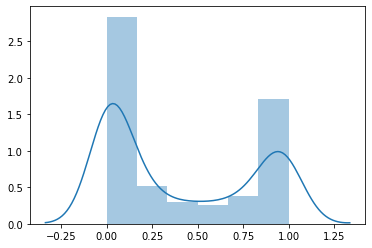

In [90]:
import seaborn as sns
sns.distplot(yhat)